# Cluster map to see the relationship between features in the data set

Authors:

     Sumeyye Su-(sumeyye.su@mavs.uta.edu) PhD student,Department of Mathematics in the University of Texas at Arlington
     Leili Shahriyari (lshahriyari@umass.edu, Advisor, Department of Mathematics and Statisics, University of Massachusetts Amherst

 Here,we first converted all the categorical features to numerical values to to find correlation between the factors that have been investigated in the paper. We used 0 and 1 values for categorical values. (For example: tumor_status features we have two different values 'tumor free' and 'with tumor'. We converted 'tumor free' :0 ,'with tumor': 1) Thus, the output of the notebook is a cluster map showing the relationship between factor.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#we used the clinical_data that we combined rna and clincal data of patients
clinical_data =pd.read_csv('clinical data.csv')

In [29]:
#combining sub-stages of TNM stage ( expample:for T1a and T1b only T1)

clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1b')), 'TUMOR_PATH']='T 1'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2b')), 'TUMOR_PATH']='T 2'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3b')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3c')), 'TUMOR_PATH']='T 3'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T4')), 'TUMOR_PATH']='T 4'
#use numerical values for each stage 
clinical_data['Stage'] = clinical_data['TUMOR_PATH'].map({'T 1':1,'T 2':2,'T 3':3,'T 4':4})
clinical_data['Stage'].head()

0    1
1    1
2    1
3    3
4    3
Name: Stage, dtype: int64

In [30]:
#use numerical values for each grade 
clinical_data.loc[(clinical_data['GRADE']=='G1'), 'Grade']=1
clinical_data.loc[(clinical_data['GRADE']=='G2'), 'Grade']=2
clinical_data.loc[(clinical_data['GRADE']=='G3'), 'Grade']=3
clinical_data.loc[(clinical_data['GRADE']=='G4'), 'Grade']=4


clinical_data['Grade'].head()

0    2.0
1    2.0
2    3.0
3    3.0
4    2.0
Name: Grade, dtype: float64

In [31]:
#use numerical values for gender

clinical_data.loc[(clinical_data['SEX']=='Female'), 'Gender']=1
clinical_data.loc[(clinical_data['SEX']=='Male'), 'Gender']=0

clinical_data['Gender'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Gender, dtype: float64

In [32]:
#use numerical values for laterality

clinical_data.loc[(clinical_data['LATERALITY']=='Left'), 'Laterality']=0
clinical_data.loc[(clinical_data['LATERALITY']=='Right'), 'Laterality']=1
clinical_data['Laterality'].head()


0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Laterality, dtype: float64

In [33]:
#use numerical values for tumor status

clinical_data.loc[(clinical_data['TUMOR_STATUS']=='WITH TUMOR'), 'Tumor_Status']=1
clinical_data.loc[(clinical_data['TUMOR_STATUS']=='TUMOR FREE'), 'Tumor_Status']=0

clinical_data['Tumor_Status'].head()


0    0.0
1    0.0
2    NaN
3    1.0
4    0.0
Name: Tumor_Status, dtype: float64

In [34]:
#use numerical values for survival status

clinical_data.loc[(clinical_data['OS_STATUS']=='LIVING'), 'Os_Status']=1
clinical_data.loc[(clinical_data['OS_STATUS']=='DECEASED'), 'Os_Status']=0
clinical_data['Os_Status'].value_counts()

1.0    358
0.0    175
Name: Os_Status, dtype: int64

In [35]:
#use numerical values for disease free status

clinical_data.loc[(clinical_data['DFS_STATUS']=='Recurred/Progressed'), 'Disease_Status']=1
clinical_data.loc[(clinical_data['DFS_STATUS']=='DiseaseFree'), 'Disease_Status']=0


clinical_data['Disease_Status'].value_counts()

0.0    309
1.0    126
Name: Disease_Status, dtype: int64

In [36]:
clinical_data.loc[(clinical_data['SERUM_CALCIUM_LEVEL']=='Low'), 'Serum_Calcium_Level']=0
clinical_data.loc[(clinical_data['SERUM_CALCIUM_LEVEL']=='Normal'), 'Serum_Calcium_Level']=1

#clinical_data['Serum_calcium_level'] = clinical_data['SERUM_CALCIUM_LEVEL'].map({'Low':0,'Normal':1})
clinical_data['Serum_Calcium_Level'].value_counts()

0.0    204
1.0    150
Name: Serum_Calcium_Level, dtype: int64

In [37]:
#rename the columns name 
clinical_data=clinical_data.rename(columns={'WBC':'Wbc','LOC100505773':'RGS5','AGE':'Age','OS_MONTHS':'Os_Months'})
clinical_data

,PATIENT_ID,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,DAYS_TO_BIRTH,...,VIM,TUMOR_PATH,Stage,Grade,Gender,Laterality,Tumor_Status,Os_Status,Disease_Status,Serum_Calcium_Level
0,TCGA-3Z-A93Z,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,11/11/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Male,-25205,...,0.526250,T 1,1,2.0,0.0,1.0,0.0,1.0,0.0,1.0
1,TCGA-6D-AA2E,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,3/17/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Female,-25043,...,0.111043,T 1,1,2.0,1.0,1.0,0.0,1.0,0.0,NaN
2,TCGA-A3-3306,9fb55e0b-43d8-40a3-8ef2-d198e6290551,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,-24569,...,0.595353,T 1,1,3.0,0.0,0.0,NaN,1.0,0.0,NaN
3,TCGA-A3-3307,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,-24315,...,0.541308,T 3,3,3.0,0.0,1.0,1.0,1.0,0.0,NaN
4,TCGA-A3-3308,3cbca837-f5a7-4a87-8f02-c59eac232d5a,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,-28287,...,0.542034,T 3,3,2.0,1.0,1.0,0.0,1.0,0.0,1.0
5,TCGA-A3-3311,0c139772-e303-45d1-b0c7-438fa1db105e,4/20/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Male,-21183,...,0.535817,T 1,1,2.0,0.0,1.0,0.0,0.0,NaN,NaN
6,TCGA-A3-3313,10c03d66-a290-4e46-9018-2932a236eb09,4/14/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,-21556,...,0.106648,T 1,1,3.0,0.0,1.0,0.0,0.0,NaN,NaN
7,TCGA-A3-3316,12c4c4f1-5880-4bf9-9945-80bf45415de6,4/14/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,-20931,...,0.229503,T 2,2,3.0,0.0,0.0,0.0,1.0,0.0,NaN
8,TCGA-A3-3317,8ee720b5-6f3a-4921-85ab-70e75c0835b0,4/14/10,Kidney Clear Cell Renal Carcinoma,G2,Left,NO,YES,Male,-24803,...,0.737944,T 2,2,2.0,0.0,0.0,0.0,1.0,1.0,NaN
9,TCGA-A3-3319,22b6724c-a59f-4796-8166-992253e8caf1,4/16/10,Kidney Clear Cell Renal Carcinoma,G2,Left,NO,YES,Male,-25699,...,0.274917,T 1,1,2.0,0.0,0.0,0.0,1.0,0.0,NaN


In [38]:
#use numerical values for wbc

clinical_data.loc[(clinical_data['Wbc']=='Normal'), 'WBC']=0
clinical_data.loc[(clinical_data['Wbc']=='Elevated'), 'WBC']=1

clinical_data['WBC'].value_counts()

0.0    267
1.0    164
Name: WBC, dtype: int64

In [39]:
#use only columns we used for features
cluster_data=clinical_data[['WBC','Serum_Calcium_Level','Disease_Status','Os_Status','Gender','Tumor_Status','Laterality','Grade','Stage','Os_Months','RGS5','Age']]
#we need to drop NaN values in order to plot the cluster map
cluster_data=cluster_data.dropna(axis=0)
cluster_data

,WBC,Serum_Calcium_Level,Disease_Status,Os_Status,Gender,Tumor_Status,Laterality,Grade,Stage,Os_Months,RGS5,Age
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1,12.65,0.394958,69
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3,0.53,0.293265,77
44,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1,33.44,0.078912,47
45,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,15.37,0.138099,57
46,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1,22.63,0.585688,49
48,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1,0.10,0.796266,59
51,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3,10.61,0.826694,37
52,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1,0.00,0.192019,65
57,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2,109.33,0.252044,54
60,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1,68.56,0.907245,72


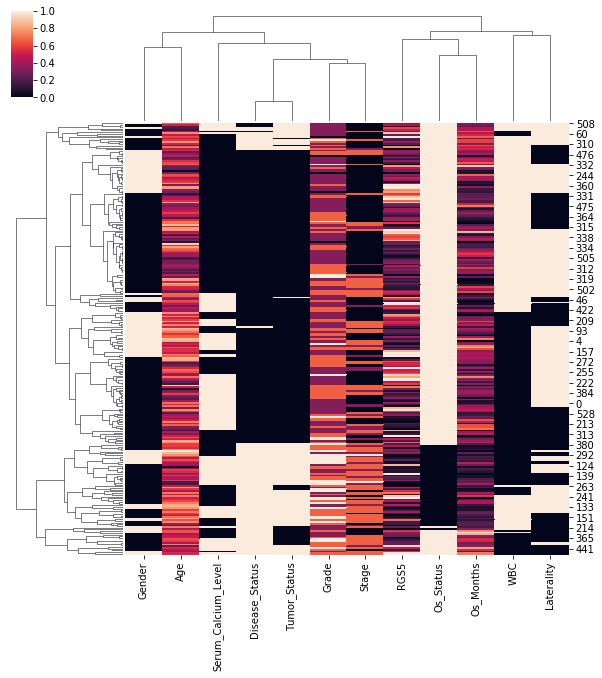

In [40]:

#cluster map 
sns.clustermap(cluster_data,metric="correlation",standard_scale=1)

plt.savefig('cluster_features.eps', format='eps',bbox_inches='tight', dpi=1000)
